In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_otsu
import os
from PIL import Image
import pickle
from collections import Counter
import pandas as pd

In [3]:
hawaii50 = cv2.imread('./data/43290879-Hawaii/hawaii-header-5-0.jpg')

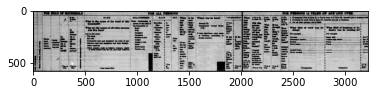

In [4]:
plt.imshow(hawaii50)

In [5]:
hawaiiside = cv2.imread('./data/43290879-Hawaii/hawaii-side.jpg')

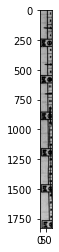

In [6]:
plt.imshow(hawaiiside)

In [8]:
fullimg = cv2.imread('./data/43290879-Hawaii/43290879-Hawaii-227245/43290879-Hawaii-227245-0005.jpg')

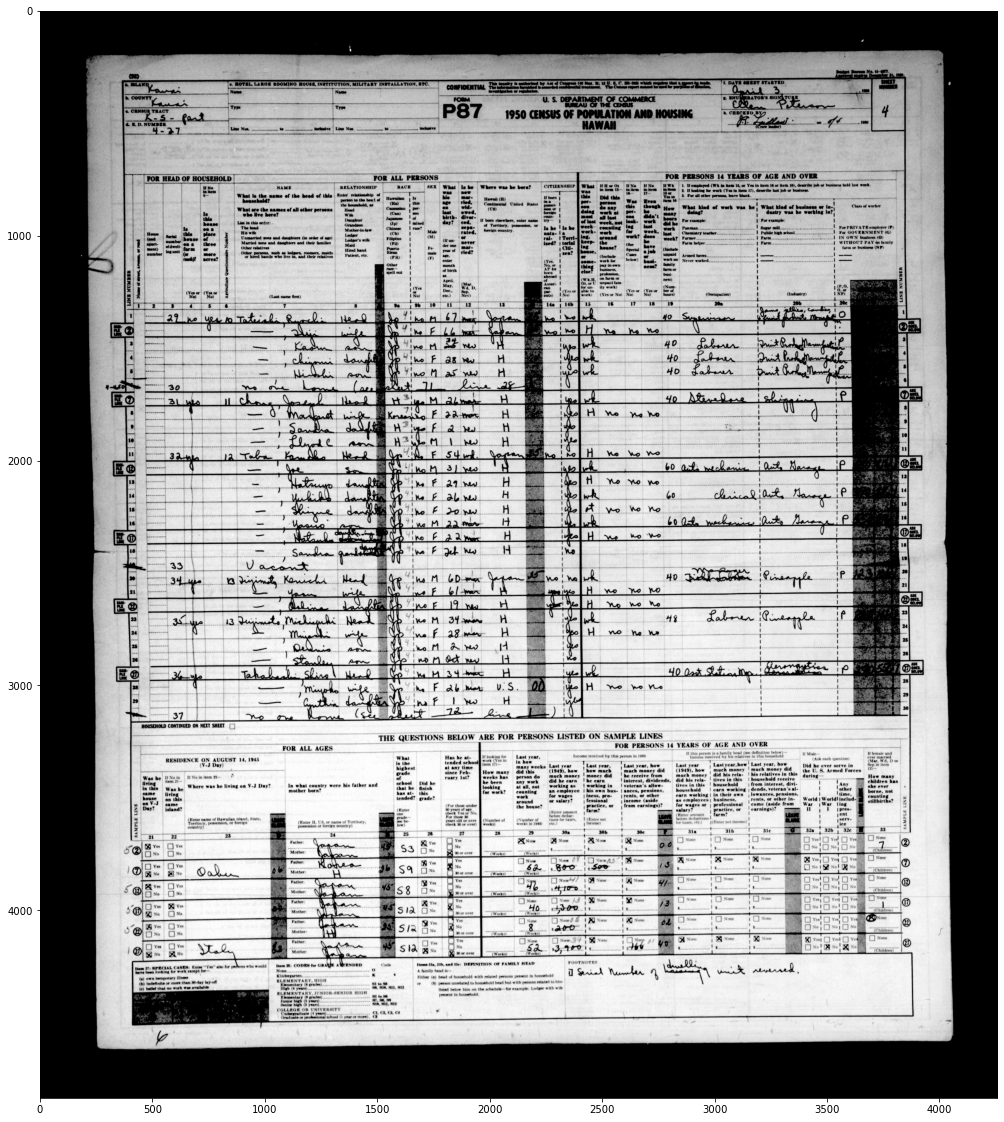

In [10]:
plt.figure(figsize=(20,20))
plt.imshow(fullimg)

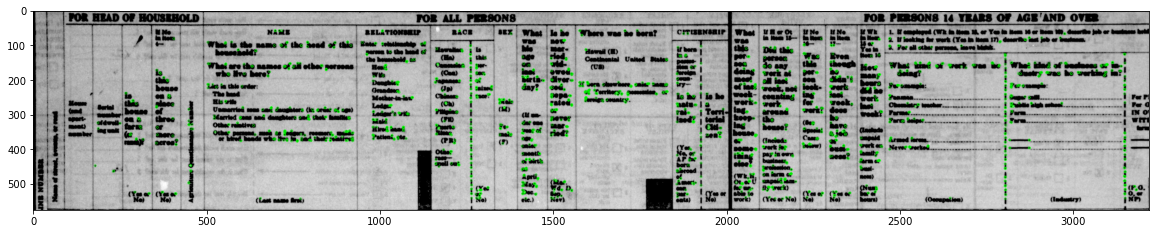

In [13]:
orb = cv2.ORB_create(nfeatures=2000)
kp, des = orb.detectAndCompute(hawaii50[:,:,0],None)
kp_img = cv2.drawKeypoints(hawaii50,kp,None, color=(0,255,0), flags =0)
plt.figure(figsize=(20,20))
plt.imshow(kp_img)

In [4]:
with open('./labeltensor_shpad.pkl','rb') as ry:
    lab_tensor_sh = pickle.load(ry)

In [5]:
charlist = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz .,-+1234567890'

In [9]:
trues = [''.join([charlist[l-1] for l in lab if l>0]) for lab in lab_tensor_sh]

In [10]:
trues[0]

'Secretary'

In [27]:
a = pd.DataFrame(Counter(''.join(trues)).most_common(), columns=['Character','Frequency'])

In [29]:
a.set_index('Character').head(10)

,Frequency
Character,
a,1028
,950
e,948
-,681
o,634
r,629
n,595
i,518
l,465


In [30]:
np.mean([len(l) for l in trues])

8.145700071073206